# EDA del conjunto de datos fraud_detection_dataset.csv

## Cargar el Dataset

In [8]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('fraud_detection_dataset.csv')


## Información General del Dataset

In [9]:
# Información general
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [10]:
# Primeras filas del dataset
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [11]:
# Resumen estadístico
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

## Análisis de Columnas

### step

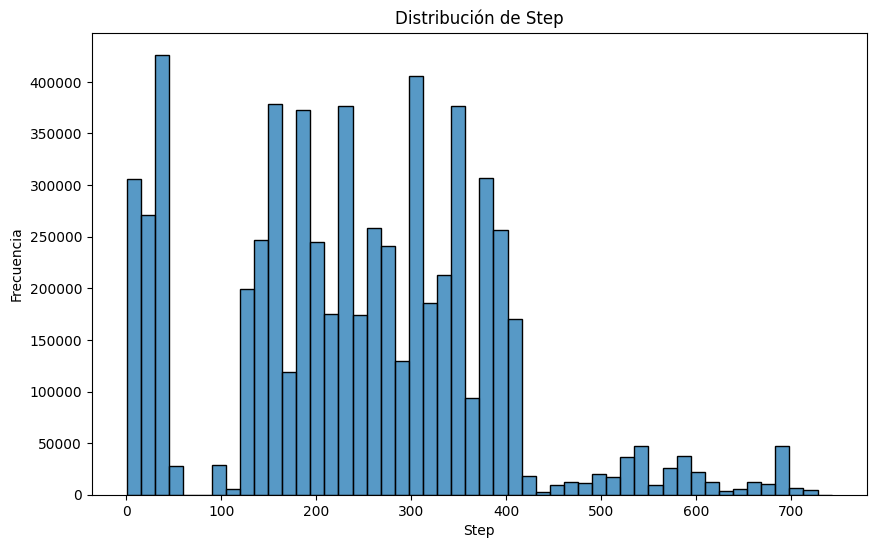

In [12]:
# Distribución de la columna 'step'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['step'], bins=50, kde=False)
plt.title('Distribución de Step')
plt.xlabel('Step')
plt.ylabel('Frecuencia')
plt.show()


### type

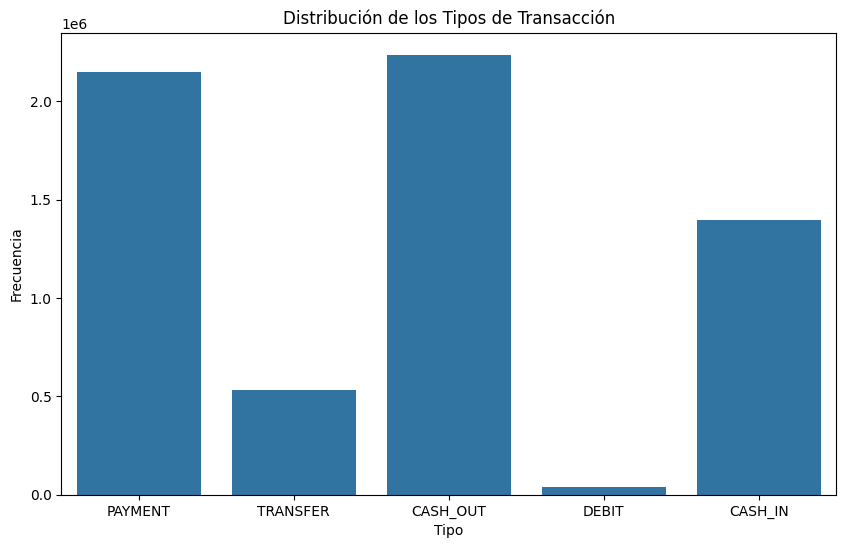

In [13]:
# Distribución de las transacciones por tipo
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribución de los Tipos de Transacción')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.show()


### amount

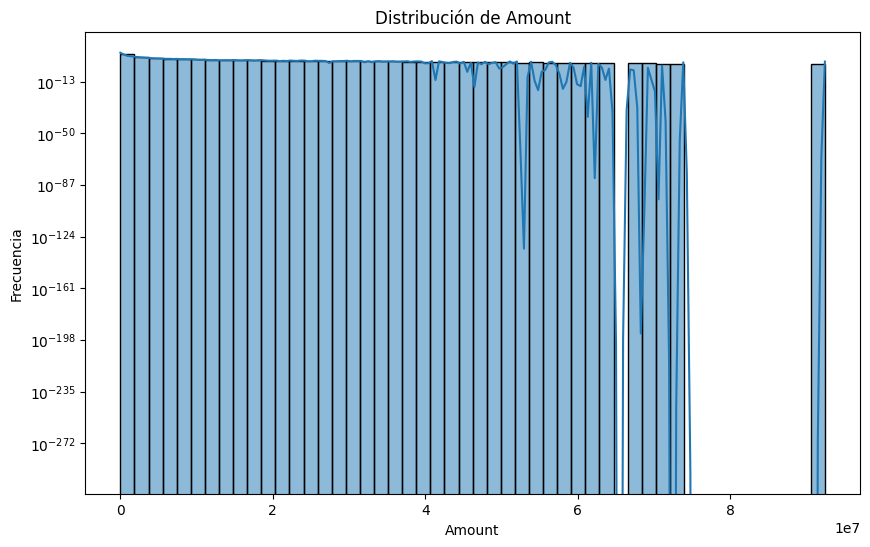

In [14]:
# Distribución de la columna 'amount'
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribución de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.show()


### oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest

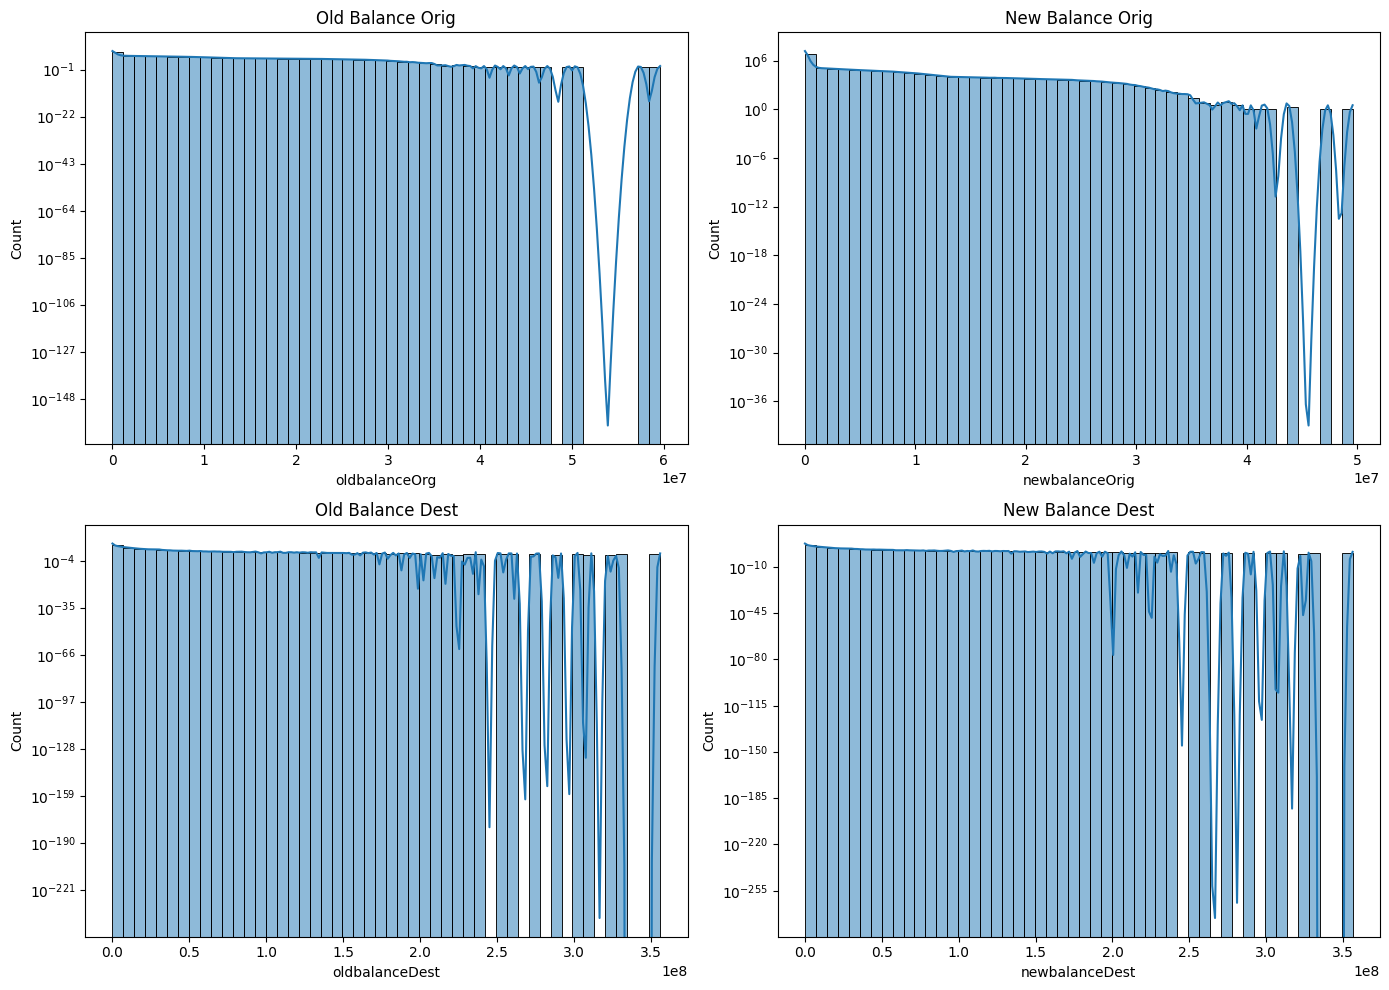

In [15]:
# Distribución de balances
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['oldbalanceOrg'], bins=50, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Old Balance Orig')
ax[0, 0].set_yscale('log')
sns.histplot(df['newbalanceOrig'], bins=50, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('New Balance Orig')
ax[0, 1].set_yscale('log')
sns.histplot(df['oldbalanceDest'], bins=50, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Old Balance Dest')
ax[1, 0].set_yscale('log')
sns.histplot(df['newbalanceDest'], bins=50, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('New Balance Dest')
ax[1, 1].set_yscale('log')
plt.tight_layout()
plt.show()


## Análisis de la Variable Objetivo

### isFraud

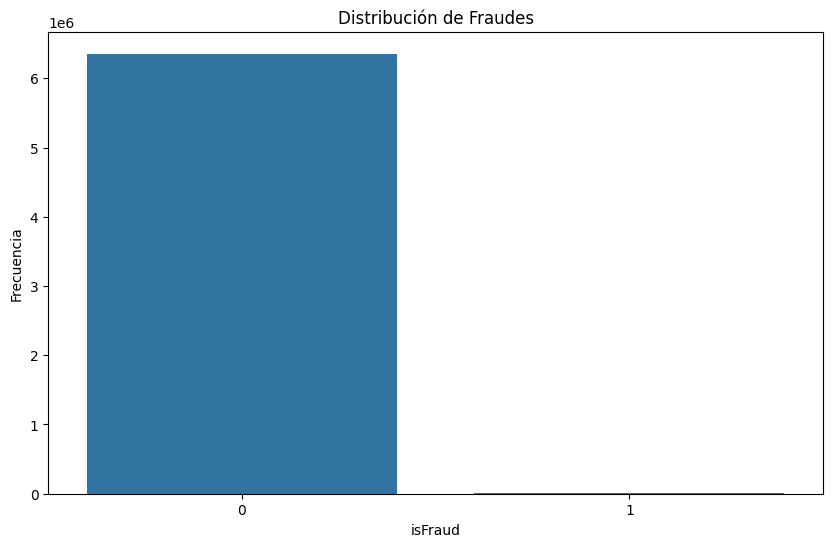

In [16]:
# Distribución de la columna 'isFraud'
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Distribución de Fraudes')
plt.xlabel('isFraud')
plt.ylabel('Frecuencia')
plt.show()


### isFlaggedFraud

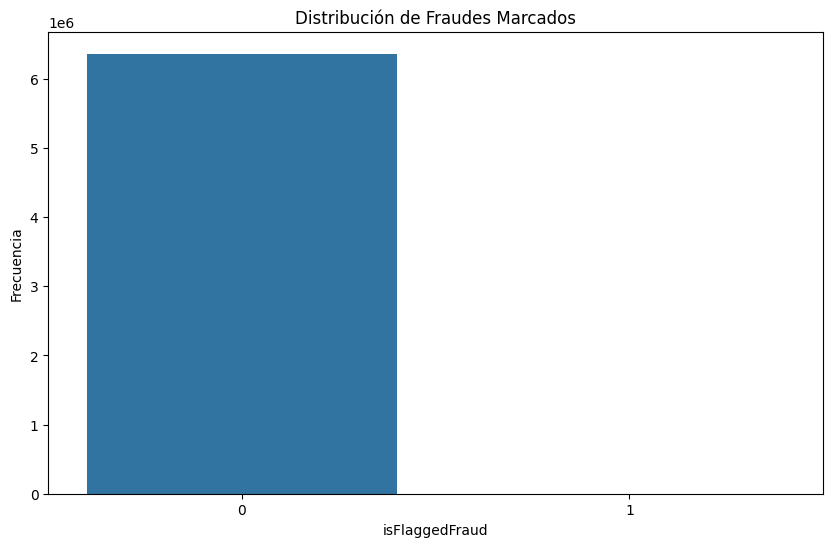

In [17]:
# Distribución de la columna 'isFlaggedFraud'
plt.figure(figsize=(10, 6))
sns.countplot(x='isFlaggedFraud', data=df)
plt.title('Distribución de Fraudes Marcados')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Frecuencia')
plt.show()


## Análisis de Correlaciones

### comprueba correlaciones entre variables numericas

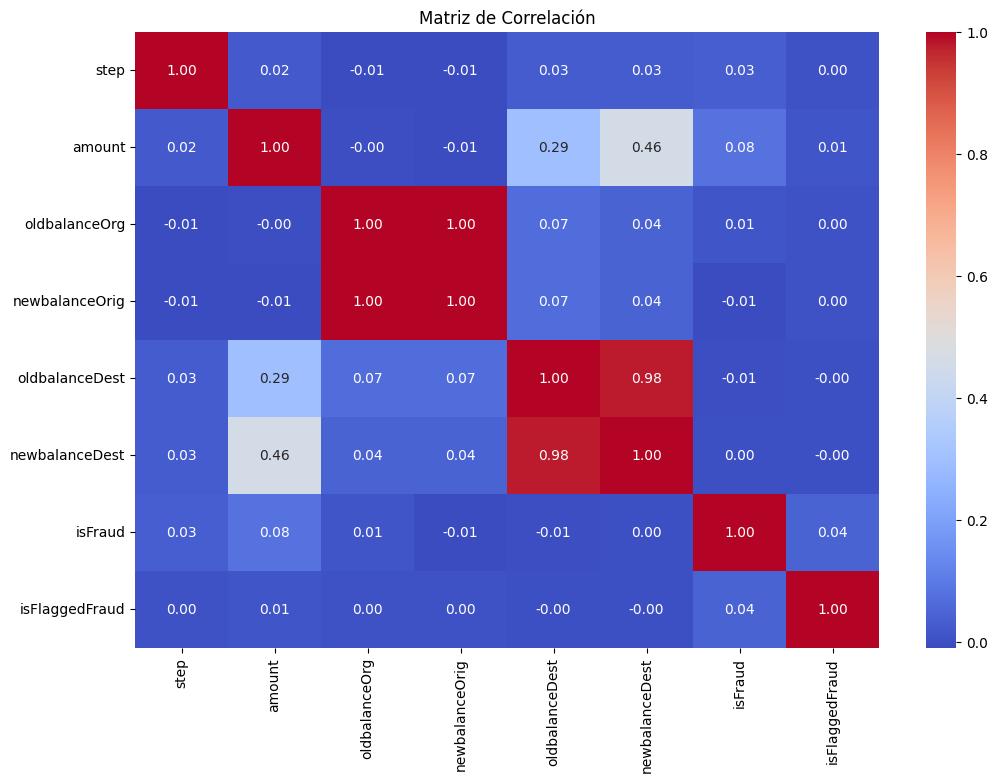

In [19]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Matriz de correlación solo con columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


## Análisis de Transacciones Fraudulentas vs No Fraudulentas

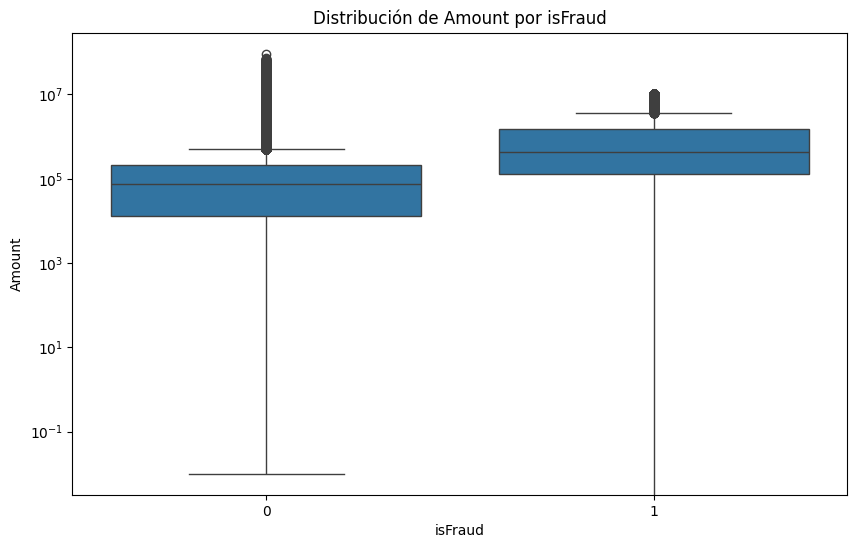

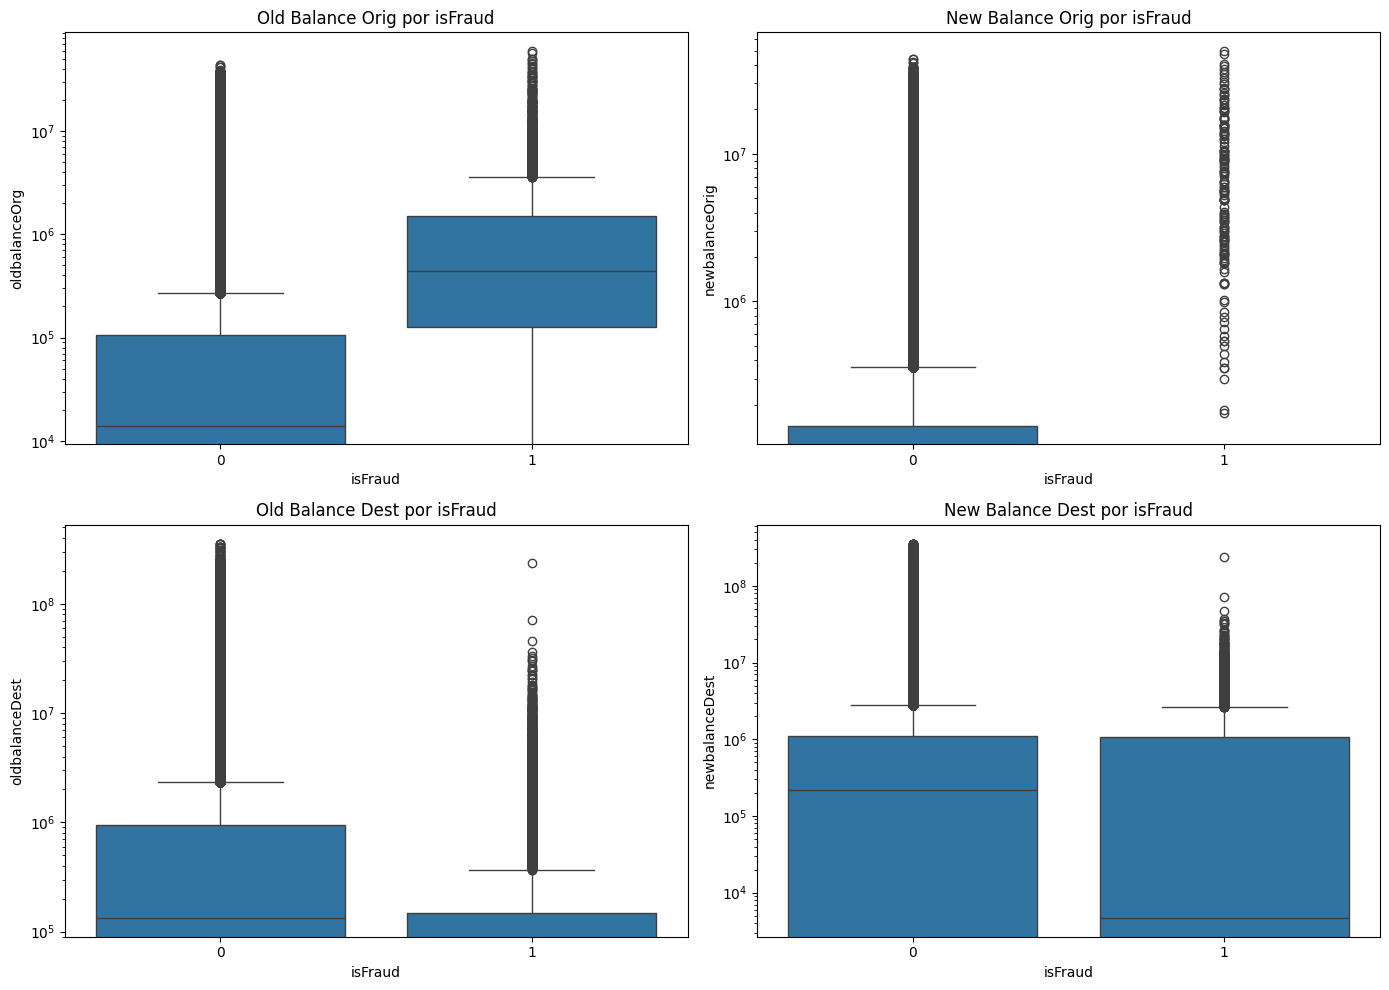

In [20]:
# Comparación de Amount para transacciones fraudulentas vs no fraudulentas
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Distribución de Amount por isFraud')
plt.xlabel('isFraud')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()

# Comparación de Old Balance y New Balance por isFraud
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Old Balance Orig por isFraud')
ax[0, 0].set_yscale('log')
sns.boxplot(x='isFraud', y='newbalanceOrig', data=df, ax=ax[0, 1])
ax[0, 1].set_title('New Balance Orig por isFraud')
ax[0, 1].set_yscale('log')
sns.boxplot(x='isFraud', y='oldbalanceDest', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Old Balance Dest por isFraud')
ax[1, 0].set_yscale('log')
sns.boxplot(x='isFraud', y='newbalanceDest', data=df, ax=ax[1, 1])
ax[1, 1].set_title('New Balance Dest por isFraud')
ax[1, 1].set_yscale('log')
plt.tight_layout()
plt.show()


##  Análisis Temporal

### se analizan las transacciones a lo largo del tiempo

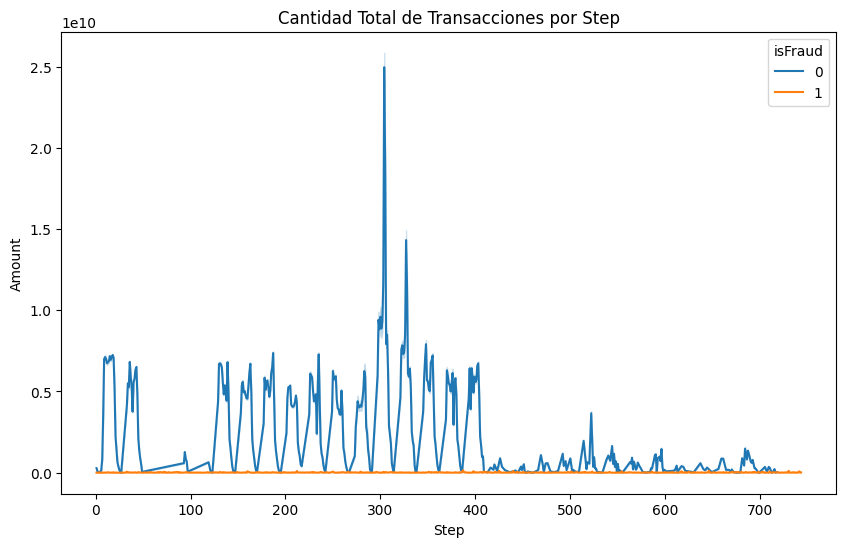

In [24]:
# Transacciones por Step
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y='amount', hue='isFraud', data=df, estimator='sum')
plt.title('Cantidad Total de Transacciones por Step')
plt.xlabel('Step')
plt.ylabel('Amount')
plt.show()


## Porcentaje de transacciones fraudulentas y no fraudulentas

In [25]:
# Contar el número de transacciones fraudulentas y no fraudulentas
num_fraudulent = df['isFraud'].sum()  # Suma de valores True (1)
num_non_fraudulent = len(df) - num_fraudulent  # Resta del total - fraudulentas

# Calcular el porcentaje de transacciones fraudulentas y no fraudulentas
percentage_fraudulent = (num_fraudulent / len(df)) * 100
percentage_non_fraudulent = (num_non_fraudulent / len(df)) * 100

# Imprimir los resultados
print(f"Porcentaje de transacciones fraudulentas: {percentage_fraudulent:.2f}%")
print(f"Porcentaje de transacciones no fraudulentas: {percentage_non_fraudulent:.2f}%")


Porcentaje de transacciones fraudulentas: 0.13%
Porcentaje de transacciones no fraudulentas: 99.87%
